In [1]:
import sys
import os
import scanpy as sc
import pandas as pd
import numpy as np
import loompy

print(sc.__version__)
print(loompy.__version__)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

loom_fn = "/Users/kriemo/Projects/sc_repos/medulloblast/results_v2/objects/grp34.loom"

obj_dir = "objects"
if not os.path.exists(obj_dir):
    os.makedirs(obj_dir)
 
# load
adata = sc.read_loom(loom_fn, sparse = True)



1.4.4.post1
2.0.17
scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.9 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
ds = loompy.connect(loom_fn)
harmony_mat = ds.ca["harmony_cell_embeddings"]
umap_mat = ds.ca["umap_harmony_cell_embeddings"]
#ds.ca.keys()
adata.obsm['X_pca'] = harmony_mat
adata.obsm['X_umap'] = umap_mat
ds.close()

In [4]:
print(adata.obs)
print(adata.var)

                        ClusterID ClusterName  UPN  \
753_AAACGAAGTCTTGGTA            3           2  753   
753_AAACGCTTCCATGATG            1           0  753   
753_AAACGCTTCGAGTGGA            2           1  753   
753_AAAGAACCAAATGGTA            5           4  753   
753_AAAGAACTCATTCATC            1           0  753   
...                           ...         ...  ...   
966-2_TTTGGAGGTATGAGAT          1           0  966   
966-2_TTTGGTTCATACAGCT          1           0  966   
966-2_TTTGGTTGTCCGTACG          3           2  966   
966-2_TTTGTTGTCGCTGACG          3           2  966   
966-2_TTTGTTGTCGTCGATA          1           0  966   

                       coarse_clusters_gp34_harmony orig_ident subgroup  \
753_AAACGAAGTCTTGGTA                              2        753      GP4   
753_AAACGCTTCCATGATG                              0        753      GP4   
753_AAACGCTTCGAGTGGA                              1        753      GP4   
753_AAAGAACCAAATGGTA                              4

In [5]:
adata.var_names_make_unique()
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata
#sc.pp.scale(adata, max_value=10)
#sc.tl.pca(adata, svd_solver='arpack')


normalizing by total count per cell
    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [6]:
mdata = pd.read_csv("../tables/metadata_2019_09_06.tsv.gz", sep="\t")
  
mdata = mdata[mdata.cell.isin(list(adata.obs.index.values))]
mdata

/miniconda3/envs/py37/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cell,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,subgroup,Dx,Date,batch,kit,...,RNA_snn_res.0.5,seurat_clusters,coarse_clusters,cdiversity,csamples,coarse_cell_type,PC_1,PC_2,UMAP_1,UMAP_2
0,753_AAACGAAGTCTTGGTA,753,7242,2668,20.988677,GP4,MED,2019-03-14T00:00:00Z,11,V3,...,15,15,0,0.586207,17,malignant,-2.665623,1.590690,9.884295,-7.577034
1,753_AAACGCTTCCATGATG,753,535,417,3.551402,GP4,MED,2019-03-14T00:00:00Z,11,V3,...,1,1,0,0.586207,17,malignant,-9.895454,-9.402855,11.714761,-3.147248
2,753_AAACGCTTCGAGTGGA,753,2983,1322,12.973517,GP4,MED,2019-03-14T00:00:00Z,11,V3,...,16,16,0,0.586207,17,malignant,-4.315912,7.025971,12.017711,-9.532184
3,753_AAAGAACCAAATGGTA,753,2536,1303,22.594637,GP4,MED,2019-03-14T00:00:00Z,11,V3,...,19,19,4,0.689655,20,malignant,-3.008834,0.668189,9.268279,0.806061
4,753_AAAGAACTCATTCATC,753,940,708,0.638298,GP4,MED,2019-03-14T00:00:00Z,11,V3,...,1,1,0,0.586207,17,malignant,-9.845117,-10.611371,11.768775,-3.384123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40083,966-2_TTTGGAGGTATGAGAT,966_2,3010,1198,27.840532,GP4,MED,2019-04-03T00:00:00Z,12,V3,...,6,6,4,0.689655,20,malignant,-0.605190,-4.929292,7.051445,1.060344
40084,966-2_TTTGGTTCATACAGCT,966_2,1439,835,9.034051,GP4,MED,2019-04-03T00:00:00Z,12,V3,...,6,6,4,0.689655,20,malignant,-8.616180,-9.964040,7.282644,-0.071414
40085,966-2_TTTGGTTGTCCGTACG,966_2,3430,1671,9.212828,GP4,MED,2019-04-03T00:00:00Z,12,V3,...,6,6,4,0.689655,20,malignant,-7.367736,-2.783592,6.227702,2.821245
40086,966-2_TTTGTTGTCGCTGACG,966_2,3891,1911,9.354922,GP4,MED,2019-04-03T00:00:00Z,12,V3,...,6,6,4,0.689655,20,malignant,-8.124433,-3.669260,6.559190,2.991300


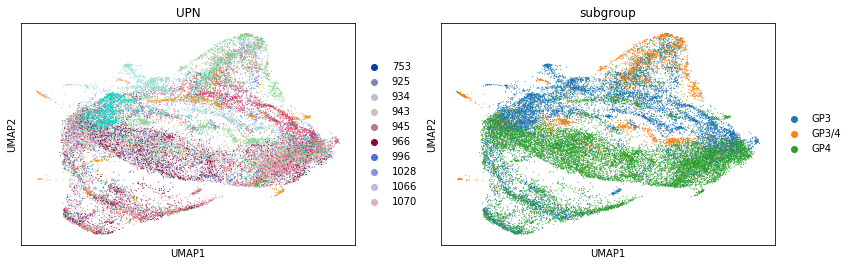

In [8]:

# reorder cell ids to match loom object
cids = pd.DataFrame({'cell' : adata.obs.index.values})
mdata = pd.merge(cids, mdata, how = 'left', on = 'cell')
mdata = mdata.dropna()


sc.pl.umap(adata, color=['UPN', 'subgroup']) 
adata.write('./objects/gp34_full_dataset.h5ad')


In [3]:
adata = sc.read_h5ad('./objects/gp34_full_dataset.h5ad')

# see https://github.com/theislab/anndata/issues/185
adata.raw._varm = None
#idx = adata.obs['clusters'].isin(['3', '6', '7', '8'])

#adata = adata[idx]
 
#sc.pp.scale(adata, max_value=10)
#sc.tl.pca(adata, svd_solver='arpack')
#sc.pl.pca(adata)

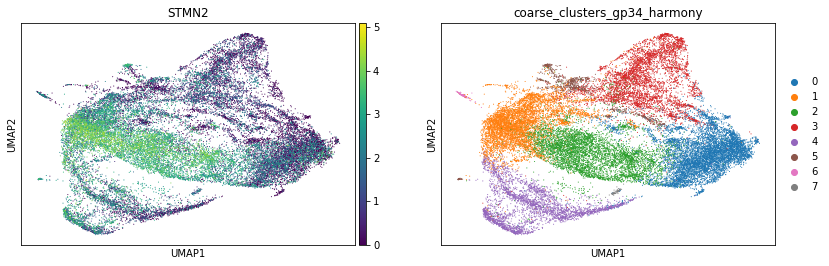

In [12]:
sc.pl.umap(adata, color=['STMN2', "coarse_clusters_gp34_harmony"]) 


In [4]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20)
sc.tl.draw_graph(adata)
sc.tl.paga(adata, groups='coarse_clusters_gp34_harmony')



computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:09)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:03:52)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


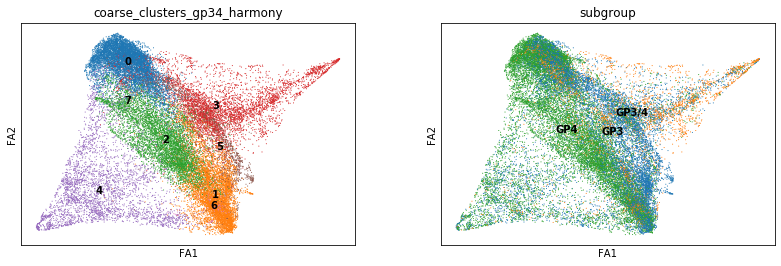

--> added 'pos', the PAGA positions (adata.uns['paga'])


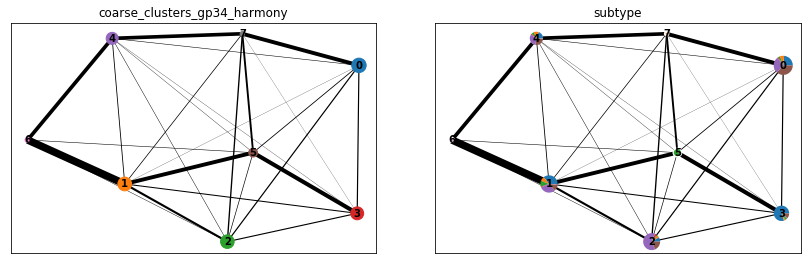

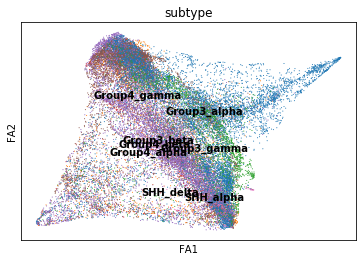

In [6]:
sc.pl.draw_graph(adata, color=['coarse_clusters_gp34_harmony', 'subgroup'], legend_loc='on data')
sc.pl.paga(adata, color=['coarse_clusters_gp34_harmony', 'subtype'])
sc.pl.draw_graph(adata, color='subtype', legend_loc='on data')

In [7]:
sc.tl.draw_graph(adata, init_pos='paga')


drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:03:42)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


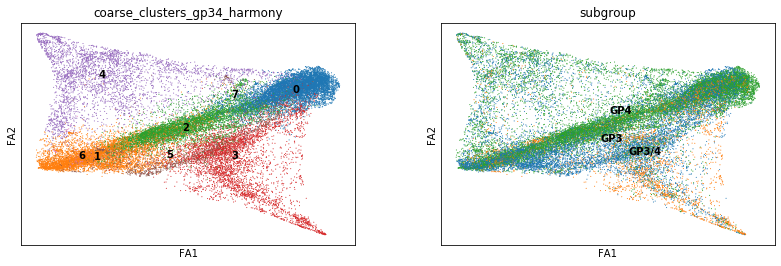

--> added 'pos', the PAGA positions (adata.uns['paga'])


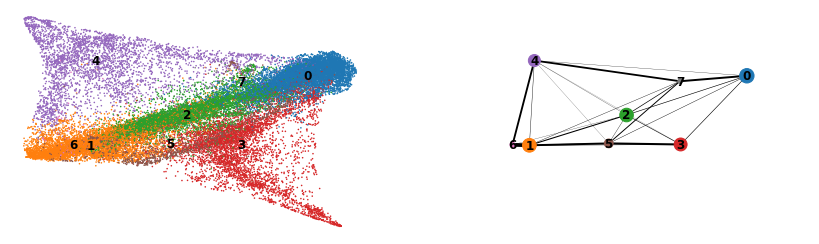

In [33]:
sc.pl.draw_graph(adata, 
                 color=['coarse_clusters_gp34_harmony', 'subgroup'],
                 legend_loc='on data', 
                 edges=False)

sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=False, save=False)



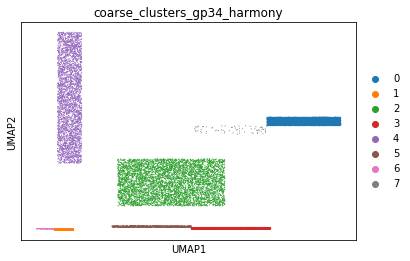

In [50]:
root_condition = (adata.obs['seurat_clusters']  == '1')
#print(np.flatnonzero(root_condition)[0])
adata.uns['iroot'] = np.flatnonzero(root_condition)[0]


#adata.raw[np.where(adata.obs['sample']  == 'control'):, 'Qpct'].X
#qpct_vals = adata[adata.obs['seurat_clusters']  == '6'].raw[:, 'SOX2'].X
#qpct_vals
#root_cell = int(np.where(qpct_vals == float(np.max(qpct_vals)))[0])
#root_cell                        
#root_cell
#adata.uns['iroot'] = root_cell

In [51]:
sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


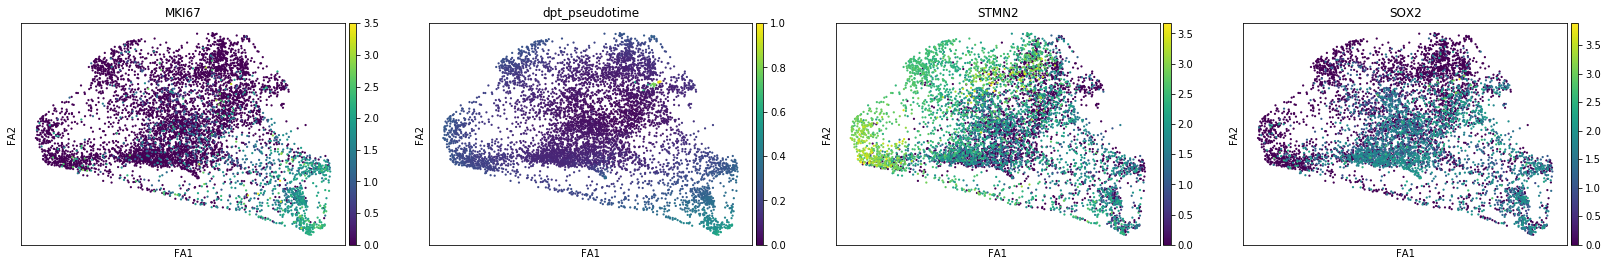

In [52]:
sc.pl.draw_graph(adata, color=['MKI67', 'dpt_pseudotime', 'STMN2', "SOX2"], legend_loc='right margin')

In [30]:
# next run some test to find genes that change via pseudotime

In [91]:
import diffxpy.api as de
adata.var.index.values

array(['MIR1302-2HG', 'OR4F5', 'AL627309.1', ..., 'AC023491.2',
       'AC004556.1', 'AC240274.1'], dtype=object)

In [86]:
test = de.test.continuous_1d(
    data=adata.X,
    continuous="dpt_pseudotime",
    df=3,
    formula_loc="~ 1 + dpt_pseudotime",
    factor_loc_totest=["dpt_pseudotime"],
    test="wald",
    sample_description=adata.obs.loc[:, ['dpt_pseudotime']],
   # quick_scale=False
  # batch_size=100
  #  training_strategy="DEFAULT"
   # dtype="float32"
)


ValueError: Missing gene names